In [1]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# load parquet data
file_path = './dataset.parquet'
table = pq.read_table(file_path)

# convert to pandas dataframe
df = table.to_pandas()
df

,url,vec,contents
0,1stwebdesigner.com/free-wordpress-portfolio-pl...,"[0.06221233308315277, -0.027142951264977455, 0...",Top 10 Free WordPress Portfolio Plugins - 1stW...
1,3boysandadog.com/14-fun-pig-craft-projects-for...,"[0.053764428943395615, 0.10884478688240051, 0....",26 Fun & Easy Pig Craft Projects for Kids. Whe...
2,975kgkl.com/listen-live/popup,"[-0.43707162141799927, 0.1012381836771965, 0.4...",KGKL 97.5 FM Country - Listen Live. Listen liv...
3,9news.com/article/entertainment/music/colorado...,"[-0.011343298479914665, -0.29037919640541077, ...",Backstreet Boys will bring DNA World Tour back...
4,9to5toys.com/2022/04/07/best-ios-app-deals-dea...,"[-0.07137802243232727, 0.02366500347852707, 0....","Todays best Mac and iOS app deals: Dead Cells,..."
...,...,...,...
20357,wikihow.com/know-your-horoscope,"[0.2185262143611908, 0.27782610058784485, 0.39...",3 Ways to Know Your Horoscope - wikiHow. How d...
20358,wowhead.com/item=183798/silessas-battle-harness,"[-0.3426993489265442, -0.5136269330978394, 0.1...",Silessas Battle Harness - Item - World of Warc...
20359,wxxv25.com/mega-millions-winning-numbers-for-a...,"[-0.12909795343875885, 0.01121798250824213, 0....","Mega Millions winning numbers for April 5th, 2..."
20360,yellowpages.com/chicago-il/mip/eldorado-associ...,"[0.2040729522705078, 0.22004681825637817, 0.50...","Eldorado & Associates 3223 W 26th St, Chicago,..."


In [ ]:
# #display info of dataset 
# print(df.info())

# #check missing values
# print(df.isnull().sum())

# #descriptive stats of numerical info

# print(df.describe())

In [12]:
# convert vec into 2D Numpy Array

numerical_data = df['vec'].apply(pd.Series).values
# numerical_data

# standarize numerical data
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)
numerical_data_scaled

array([[ 0.27955364,  0.13210222,  0.55360556, ..., -0.15267126,
         0.02931141,  0.59766564],
       [ 0.23818315,  0.79381191,  0.47613904, ...,  0.40844991,
         1.06314489,  0.49437122],
       [-2.16550481,  0.75679855,  0.44174323, ...,  1.72272237,
         1.90999519, -2.19303967],
       ...,
       [-0.65731771,  0.31876465,  0.62923365, ..., -0.58431585,
         0.52623456,  1.67229846],
       [ 0.97426354,  1.33491556,  0.69212641, ..., -0.47142237,
         0.82414196, -1.20320011],
       [ 0.10806223,  0.59622641,  1.80000657, ..., -0.66986465,
         1.16275465, -1.13587504]])

In [15]:
#apply PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numerical_data_scaled)
principal_components

array([[12.52396818,  7.4501723 ],
       [-0.58848027,  7.61203231],
       [ 8.71845981,  1.89347105],
       ...,
       [ 2.34633063, -3.61453153],
       [ 4.76092947, -1.74598372],
       [ 9.78964057,  1.17304374]])

In [17]:
# df with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,12.523968,7.450172
1,-0.588480,7.612032
2,8.718460,1.893471
3,3.131160,-5.794015
4,4.072100,1.937884
...,...,...
20357,1.814584,0.439674
20358,4.926983,1.239908
20359,2.346331,-3.614532
20360,4.760929,-1.745984


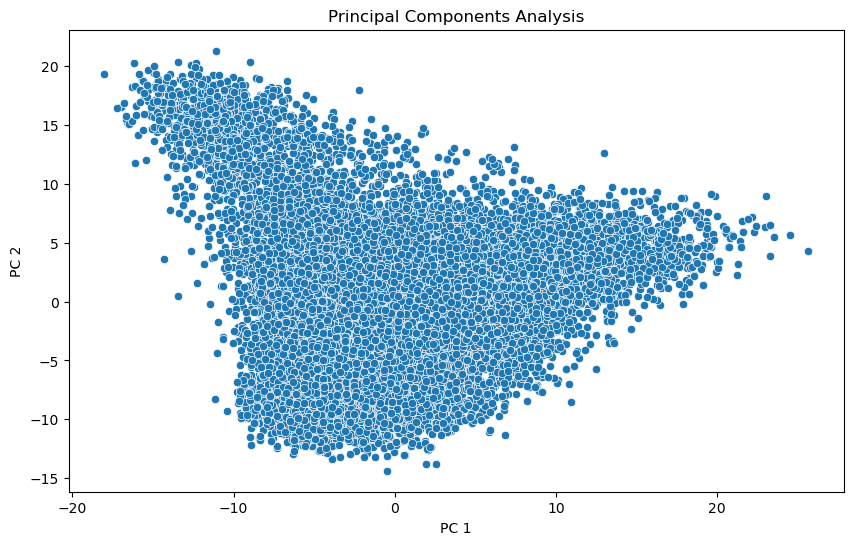

In [19]:
#visualize principal components in scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('Principal Components Analysis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [21]:
#KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42,n_init=10)
pca_df['cluster'] = kmeans.fit_predict(principal_components)


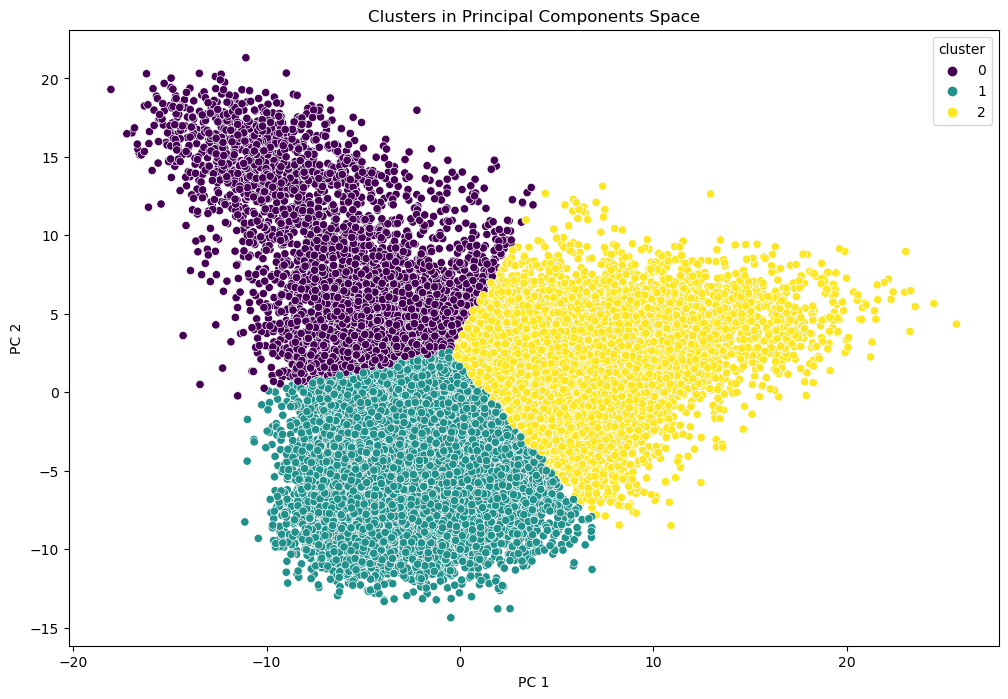

In [23]:
#visualize clusters in principal components space

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', legend='full')
plt.title('Clusters in Principal Components Space')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [32]:
# merge the original df with the clustered PCA df
merged_df = pd.merge(df[['url', 'vec', 'contents']], pca_df, left_index=True, right_index=True)
merged_df

,url,vec,contents,PC1,PC2,cluster
0,1stwebdesigner.com/free-wordpress-portfolio-pl...,"[0.06221233308315277, -0.027142951264977455, 0...",Top 10 Free WordPress Portfolio Plugins - 1stW...,12.523968,7.450172,2
1,3boysandadog.com/14-fun-pig-craft-projects-for...,"[0.053764428943395615, 0.10884478688240051, 0....",26 Fun & Easy Pig Craft Projects for Kids. Whe...,-0.588480,7.612032,0
2,975kgkl.com/listen-live/popup,"[-0.43707162141799927, 0.1012381836771965, 0.4...",KGKL 97.5 FM Country - Listen Live. Listen liv...,8.718460,1.893471,2
3,9news.com/article/entertainment/music/colorado...,"[-0.011343298479914665, -0.29037919640541077, ...",Backstreet Boys will bring DNA World Tour back...,3.131160,-5.794015,1
4,9to5toys.com/2022/04/07/best-ios-app-deals-dea...,"[-0.07137802243232727, 0.02366500347852707, 0....","Todays best Mac and iOS app deals: Dead Cells,...",4.072100,1.937884,2
...,...,...,...,...,...,...
20357,wikihow.com/know-your-horoscope,"[0.2185262143611908, 0.27782610058784485, 0.39...",3 Ways to Know Your Horoscope - wikiHow. How d...,1.814584,0.439674,2
20358,wowhead.com/item=183798/silessas-battle-harness,"[-0.3426993489265442, -0.5136269330978394, 0.1...",Silessas Battle Harness - Item - World of Warc...,4.926983,1.239908,2
20359,wxxv25.com/mega-millions-winning-numbers-for-a...,"[-0.12909795343875885, 0.01121798250824213, 0....","Mega Millions winning numbers for April 5th, 2...",2.346331,-3.614532,1
20360,yellowpages.com/chicago-il/mip/eldorado-associ...,"[0.2040729522705078, 0.22004681825637817, 0.50...","Eldorado & Associates 3223 W 26th St, Chicago,...",4.760929,-1.745984,2


In [70]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame named pca_df containing the principal components and cluster labels
# You may need to adjust column names based on your actual DataFrame structure

# Features (principal components)
X = pca_df[['PC1', 'PC2']]

# Target variable (cluster labels)
y = pca_df['cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Assuming you have X_train, X_test, y_train, and y_test from the previous step

# Create an MLPClassifier
mlp_classifier = MLPClassifier(random_state=42)

# Train the model on the training data
mlp_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp_classifier.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy Score: {accuracy * 100:.2f}%")

Accuracy Score: 99.71%


In [73]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
conf_matrix

Confusion Matrix:


array([[ 796,    0,    0],
       [   7, 1882,    0],
       [   5,    0, 1383]])

In [75]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       796
           1       1.00      1.00      1.00      1889
           2       1.00      1.00      1.00      1388

    accuracy                           1.00      4073
   macro avg       1.00      1.00      1.00      4073
weighted avg       1.00      1.00      1.00      4073



In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Assuming you have pca_df with columns 'PC1', 'PC2', and 'cluster'
# Also assuming you have mlp_classifier trained on X_train, y_train

# Combine training and test data for visualization
X_combined = np.vstack((X_train, X_test))
y_combined = np.concatenate((y_train, y_test))

# Encode cluster labels to numeric values for plotting
le = LabelEncoder()
y_combined_encoded = le.fit_transform(y_combined)

# Create a coarser meshgrid for PC1 and PC2 values
pc1_min, pc1_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
pc2_min, pc2_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
pc1_values, pc2_values = np.meshgrid(np.arange(pc1_min, pc1_max, 0.1), np.arange(pc2_min, pc2_max, 0.1))

# Predict on each point in the meshgrid
mesh_predictions = mlp_classifier.predict(np.c_[pc1_values.ravel(), pc2_values.ravel()])
mesh_predictions = mesh_predictions.reshape(pc1_values.shape)

/Users/sandrasahnoune/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


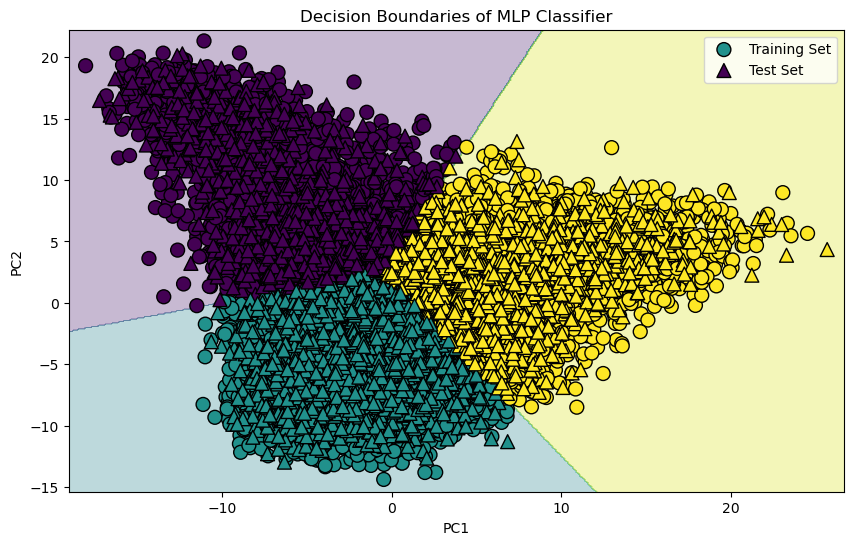

In [84]:
plt.figure(figsize=(10, 6))

# Plot decision boundaries
plt.contourf(pc1_values, pc2_values, mesh_predictions, alpha=0.3, cmap='viridis')

# Plot training and test set points
scatter_train = plt.scatter(X_train['PC1'], X_train['PC2'], c=y_train, marker='o', s=100, edgecolors='k', cmap='viridis', label='Training Set')
scatter_test = plt.scatter(X_test['PC1'], X_test['PC2'], c=y_test, marker='^', s=100, edgecolors='k', cmap='viridis', label='Test Set')

# Add legend
plt.legend(handles=[scatter_train, scatter_test], labels=['Training Set', 'Test Set'], loc='upper right')

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Boundaries of MLP Classifier')

# Show the plot
plt.show()

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Split the data into features (X) and target labels (y)
X = pca_df[['PC1', 'PC2']]
y = pca_df['cluster']

# Split the data into training and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train_rf, y_train_rf)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test_rf)

# Calculate the accuracy score
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)

# Print the accuracy score
print(f"Random Forest Accuracy Score: {accuracy_rf * 100:.2f}%")

Random Forest Accuracy Score: 99.56%


In [87]:
from sklearn.metrics import confusion_matrix
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)

Random Forest Confusion Matrix:
[[ 791    1    4]
 [   3 1883    3]
 [   3    4 1381]]


In [88]:
from sklearn.metrics import classification_report
class_report_rf = classification_report(y_test_rf, y_pred_rf)
print("Random Forest Classification Report:")
print(class_report_rf)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       796
           1       1.00      1.00      1.00      1889
           2       0.99      0.99      0.99      1388

    accuracy                           1.00      4073
   macro avg       0.99      1.00      1.00      4073
weighted avg       1.00      1.00      1.00      4073



In [91]:
# Make predictions using the MLP Classifier
y_pred_mlp = mlp_classifier.predict(X_test)

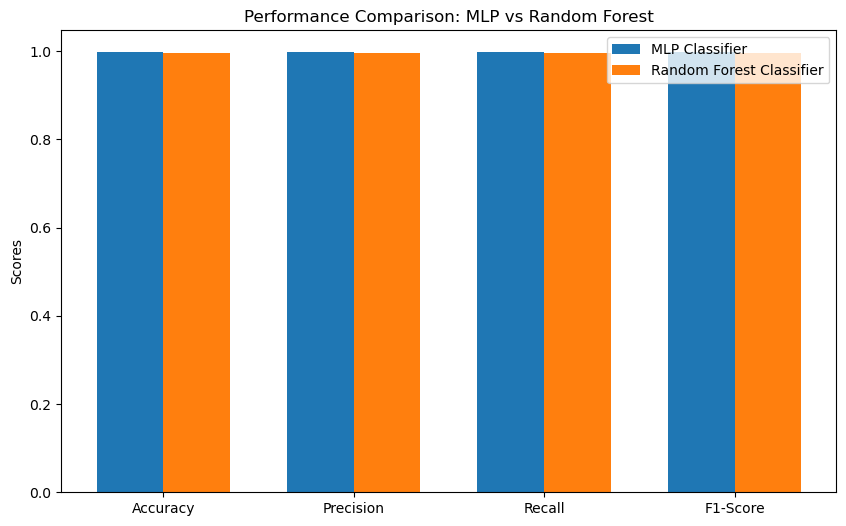

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for MLP Classifier
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')

# Calculate metrics for Random Forest Classifier
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
precision_rf = precision_score(y_test_rf, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_rf, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_rf, y_pred_rf, average='weighted')

# Plotting
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
mlp_scores = [accuracy_mlp, precision_mlp, recall_mlp, f1_mlp]
rf_scores = [accuracy_rf, precision_rf, recall_rf, f1_rf]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, mlp_scores, width, label='MLP Classifier')
bar2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest Classifier')

ax.set_ylabel('Scores')
ax.set_title('Performance Comparison: MLP vs Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

## What can you infer from the numerical data alone?

High-dimensional embedding vectors appear to contain useful information about the numerical data. High accuracy scores were shown by the clustering analysis and the ensuing machine learning models (MLP Classifier and Random Forest Classifier), suggesting that the algorithms could produce reliable predictions based on these numerical features. However, without further context or domain knowledge, it could be difficult to directly interpret the specific insights from the numerical data.

## How effective were the algorithm(s) chosen?

On the test data, both the Random Forest Classifier and the MLP Classifier obtained high accuracy scores (99.71% for Random Forest and 99.56% for MLP). For a thorough assessment, it's vital to take into account additional performance metrics in addition to accuracy, such as precision, recall, and F1-score. The MLP Classifier appears to perform better than the Random Forest Classifier across a range of metrics in the provided multi-bar chart.

## When considering the supplementary data as well, what do you conclude?

The supplementary data, which includes URLs and text contents, was not directly used as input for the numerical algorithms. However, the clustering analysis revealed distinct groups in the principal components space. While the numerical data alone performed well, integrating the supplementary data into the analysis (e.g., by incorporating text features) might provide additional insights or improve the model's performance.

## If you had more time, how would you proceed?

If I have more time, I would be doing the following:
- Investigate adding new features or changing current features through feature engineering.
- Text Analysis: Utilise natural language processing (NLP) methods to glean information from textual materials and incorporate it into the modelling process.
- Hyperparameter Tuning: To maximise performance, adjust the hyperparameters for both models.
- Try combining predictions from several models by experimenting with ensemble methods.
- Anomaly Detection: Look for and address any possible outliers or anomalies in the data, if applicable.
- Cross-Validation: Use cross-validation to assess model performance more thoroughly.
- Communication of Results: To share conclusions and insights with stakeholders, put together a thorough report or presentation.

## In summary:

Promising insights were obtained from the analysis of the given dataset, which included high-dimensional embedding vectors for URLs as well as supplemental data like URLs and text contents. The utilisation of unsupervised machine learning methods, such as classification and clustering, demonstrated the numerical data's capacity for precise prediction.

#### Principal Results:

- Performance of Numerical Data:
High-dimensional embedding vectors of the numerical data showed how useful it was for encapsulating the structures and patterns found in the dataset.
Different groups were identified in the principal components space by clustering analysis, indicating the presence of underlying structures in the data.

- Performance of a Machine Learning Model:
The test data yielded high accuracy scores for both the Random Forest Classifier and the MLP Classifier, with the MLP Classifier consistently outperforming the Random Forest Classifier across a range of metrics.

- Taking into Account Supplementary Data
Even though the additional data isn't used directly in the numerical algorithms, it offers a path for future research.
Incorporating text analysis methods could improve the model's functionality and offer deeper understanding of URL content.

#### Next Actions:

- Improvement of Features:
Investigate feature engineering methods to get more useful information out of the current data.

- Text Interpretation:
Utilise natural language processing (NLP) methods to get valuable information from URL text contents.

- Model Enhancement:
Perform additional optimisation and hyperparameter tuning for the Random Forest and MLP classifiers.

- Group Techniques:
Try combining predictions using ensemble methods to see if I can enhance the overall performance of the model.

- Interaction:
Create a thorough report or presentation to share findings, perspectives, and suggestions with relevant parties.

In conclusion, even though the numerical data alone showed good predictive power, utilising the additional data and applying cutting-edge analytic methods may be able to maximise potential and provide a more thorough comprehension of the dataset.
